In [1]:
import numpy as np

**Задача 1.** Оценить вероятность того, что на игральной кости выпадет больше 4 очков. Сравнить с теоретической вероятностью.

In [2]:
2 / 6

0.3333333333333333

In [17]:
(np.random.randint(1, 7, size=100_000_000) > 4).mean()

0.19996132

In [16]:
x = np.random.randint(1, 7, size=1_000_000) > 4
x.sum() / len(x)

0.333951

**Задача 1А** (опциональная). Дан квадрат, в который вписан круг (касаясь сторон квадрата). В квадрат случайным образом попадают точки. Какова вероятность, что наугад взятая точка попадёт в круг?  
_Подсказка:_ Удобно взять квардат со стороной, равной 2, и отсчитывать координаты точек от его центра.

In [18]:
import math

In [19]:
math.pi / 4

0.7853981633974483

In [20]:
x, y = np.random.uniform(-1, 1, size=(2, 1_000_000))
(x**2 + y**2 < 1).mean()

0.785395

In [21]:
(x**2 + y**2 < 1).mean() * 4

3.14158

**Задача 2.** Смоделировать стрельбу по мишени.

In [22]:
import seaborn as sns
sns.set_theme()

<AxesSubplot:>

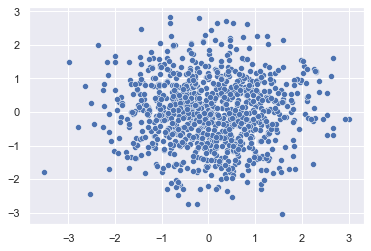

In [24]:
x, y = np.random.normal(0, 1, size=(2, 1000))
sns.scatterplot(x=x, y=y)

**Задача 3.** Графически определить распределение измеренных значений физической величины, когда измерительный прибор имеет случайную погрешность.

In [25]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/data.log", sep=" ")["az"]
data.describe()

count    1040.000000
mean       -9.797112
std         0.087958
min       -10.030373
25%        -9.866481
50%        -9.800747
75%        -9.727398
max        -9.570811
Name: az, dtype: float64

<AxesSubplot:ylabel='Frequency'>

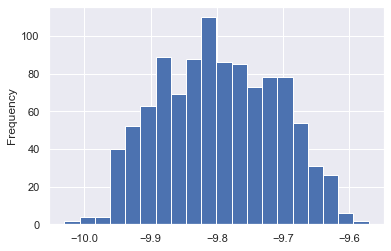

In [26]:
data.plot.hist(bins=20)

<AxesSubplot:ylabel='Count'>

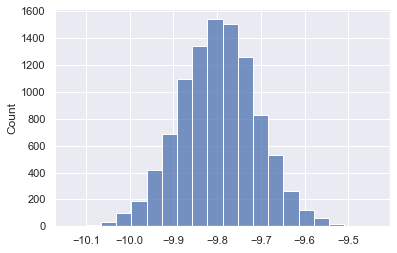

In [27]:
x = np.random.normal(data.mean(), data.std(ddof=1), size=10_000)
sns.histplot(x=x, bins=20)

**Задача 4.** Рассчитать вероятность того, что пациент заражён COVID-19, если известно, что тест дал положительный результат. Сравнить с результатом моделирования.

In [28]:
prev = 0.1     # Распространённость болезни
sens = 0.98    # Чувствительность теста
spec = 0.95    # Специфичность теста

(sens * prev) / (sens * prev + (1 - spec) * (1 - prev))

0.6853146853146851

In [30]:
a, b = np.random.random(size=(2, 1_000_000)) # np.random.uniform(0, 1)
positive = a < prev
tp = (b[positive] < 0.98).sum()
fp = (b[~positive] > 0.95).sum()
tp / (tp + fp)

0.6861742160278745